Сформулируйте выводы по проделанной работе:

a) Сделайте таблицу вида |способ выбора признаков|количество признаков|средняя точность модели|.

In [451]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report as c_rep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x_data_generated, y_data_generated = make_classification(scale=1, random_state=2)

In [452]:
df = pd.DataFrame(x_data_generated)

In [502]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-0.266237,1.578341,0.247676,0.687824,-1.847434,0.953177,-0.345242,-0.665180,0.793525,-0.034685,0.838713,1.332393,0.457189,0.696194,0.149828,0.391683,0.080271,-0.170702,0.765867,-2.168618
1,0.095557,-1.275961,1.802963,-1.088162,-1.595212,1.288769,0.134925,-2.002079,-0.500791,-1.107439,0.303234,1.522093,-0.982756,-0.176286,-0.829875,-0.757856,-1.778601,2.086683,1.147100,-0.344624
2,-0.351827,0.274941,-0.745715,0.087547,0.894523,0.466792,-0.986960,0.474161,-0.733520,-0.437133,-3.326870,-0.791480,1.286021,0.017672,-0.722067,-0.504842,1.049926,1.647945,-0.294323,1.091709
3,-0.307988,-0.523734,1.299232,-1.014463,-1.516978,-0.065410,0.766116,0.287208,-0.952897,0.780754,1.189528,1.350327,-0.543883,-1.055840,0.021202,-1.115264,-0.061635,0.184302,-1.529391,-0.330676
4,1.335312,0.893236,0.039855,-0.935869,-0.890852,0.099499,-2.404226,-1.637614,-0.258049,1.390346,1.301120,0.623885,-0.486319,-1.651680,-1.001305,0.735410,-0.507074,-0.328568,1.088858,-0.364615


In [454]:
y_data_generated

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [455]:
X_train, X_test, y_train, y_test = train_test_split(df, y_data_generated, test_size=.2, random_state=42)

In [456]:
logReg = LogisticRegression(random_state=42)

In [457]:
logReg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [458]:
logRegPredict = logReg.predict(X_test)

In [459]:
logRegInitial_score = logReg.score(X_train, y_train)

In [460]:
logReg.score(X_test, y_test)

0.95

Постройте модель логистической регрессии и оцените среднюю точность. Для этого используйте следующий код:

cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()

In [461]:
cross_val_score(logReg, X_train, y_train, scoring='accuracy').mean()

0.8

In [462]:
cvs_score = cross_val_score(logReg, X_test, y_test, scoring='accuracy').mean()

In [463]:
print(c_rep(y_test, logRegPredict))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.91      0.95        11

    accuracy                           0.95        20
   macro avg       0.95      0.95      0.95        20
weighted avg       0.96      0.95      0.95        20



Используйте статистические методы для отбора признаков:

a) Выберите признаки на основе матрицы корреляции.

b) Отсеките низковариативные признаки (VarianceThreshold).

c) Повторите п. 2 на отобранных признаках в п. 3a, п. 3b.

In [464]:
correlation_df = df.copy()
correlation_df['y'] = y_data_generated

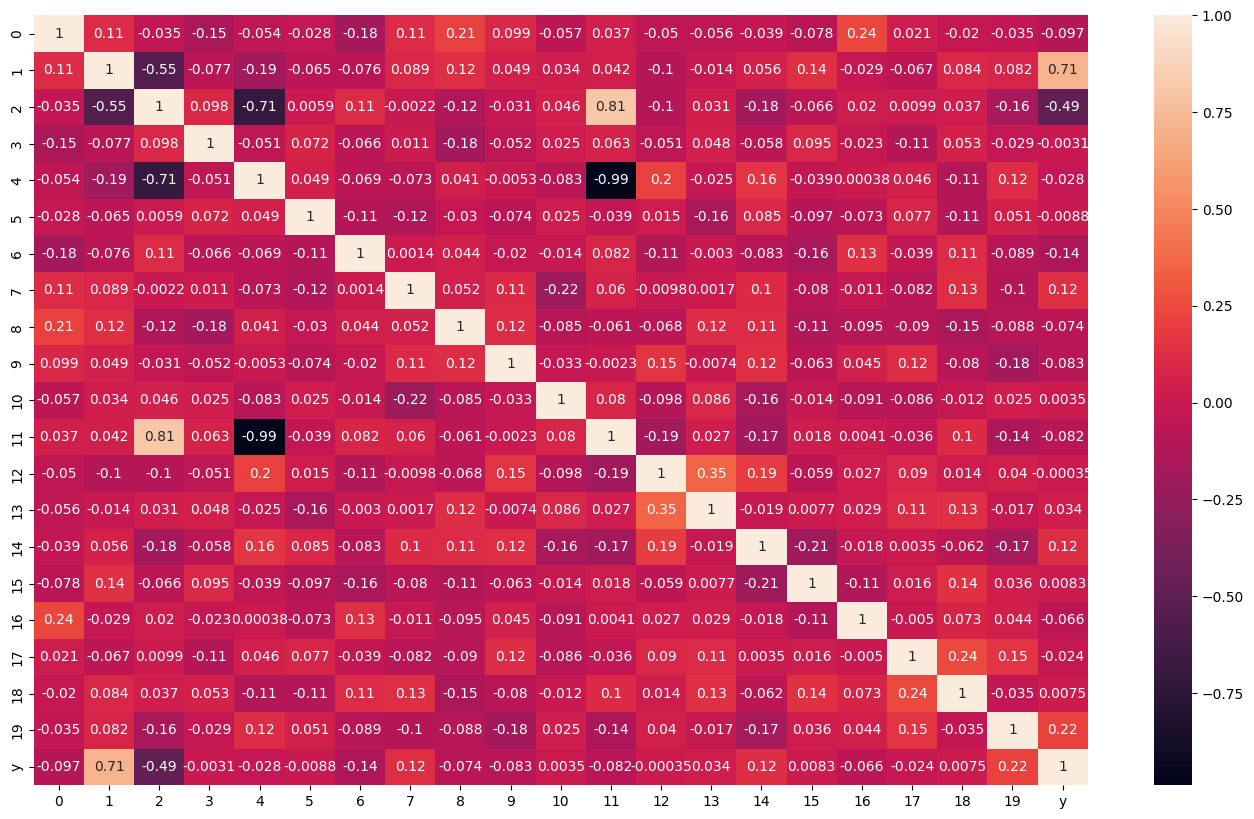

In [465]:
corr = correlation_df.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr,annot=True)
plt.show()

In [466]:
# corr.loc[corr['y'] >= 0.1].index

In [467]:
correlation_df = correlation_df[corr.loc[corr['y'] >= 0.0005].index].drop('y', axis=1)

In [468]:
correlation_df.head()

,1,7,10,13,14,15,18,19
0,1.578341,-0.665180,0.838713,0.696194,0.149828,0.391683,0.765867,-2.168618
1,-1.275961,-2.002079,0.303234,-0.176286,-0.829875,-0.757856,1.147100,-0.344624
2,0.274941,0.474161,-3.326870,0.017672,-0.722067,-0.504842,-0.294323,1.091709
3,-0.523734,0.287208,1.189528,-1.055840,0.021202,-1.115264,-1.529391,-0.330676
4,0.893236,-1.637614,1.301120,-1.651680,-1.001305,0.735410,1.088858,-0.364615


In [469]:
logRegCorr = LogisticRegression(random_state=42)

In [470]:
X_train, X_test, y_train, y_test = train_test_split(correlation_df, y_data_generated, test_size=.2, random_state=42)

In [471]:
logRegCorr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [472]:
logRegCorrPredict = logRegCorr.predict(X_test)

In [473]:
logRegCorrPredict

array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [474]:
logRegCorr.score(X_train, y_train)

0.8875

In [475]:
logreg_score = logRegCorr.score(X_test, y_test)

In [476]:
print(cross_val_score(logRegCorr, X_train, y_train, scoring='accuracy').mean())
print(cross_val_score(logRegCorr, X_test, y_test, scoring='accuracy').mean())

0.7875
0.85


In [477]:
print(c_rep(y_test, logRegCorrPredict))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.82      0.82      0.82        11

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20



Осуществите отбор признаков на основе дисперсионного анализа:

a) Выберите 5 лучших признаков с помощью скоринговой функции для классификации
f_classif (SelectKBest(f_classif, k=5)).

b) Повторите п. 2 на отобранных признаках.

In [478]:
dispersion_df = df.copy()

In [479]:
X_train, X_test, y_train, y_test = train_test_split(dispersion_df, y_data_generated, test_size=.2, random_state=42)

In [480]:
selector = SelectKBest(f_classif, k=10)
X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(80, 10)

In [481]:
knn = KNeighborsClassifier().fit(X_tr, y_train)
knn_score = knn.score(X_t, y_test)

Отбор с использованием моделей:

a) Реализуйте отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используйте L1 регуляризацию. Повторите п. 2 на отобранных признаках в п. 5a, п. 5b.

In [482]:
from sklearn.feature_selection import SelectFromModel

In [483]:
sfm_df = df.copy()
X_train, X_test, y_train, y_test = train_test_split(sfm_df, y_data_generated, test_size=.2, random_state=42)

In [484]:
lr = LogisticRegression(random_state=42).fit(X_tr, y_train)

In [485]:
sfm = SelectFromModel(lr, prefit=False, max_features=5, threshold=-np.inf)

X_tr = selector.fit_transform(X_train, y_train)
X_t = selector.transform(X_test)

X_tr.shape

(80, 10)

In [486]:
lr = LogisticRegression(random_state=42).fit(X_tr, y_train)
sfm_lr_score = lr.score(X_t, y_test)

Реализуйте отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.

In [487]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
rf.score(X_test, y_test)

0.9

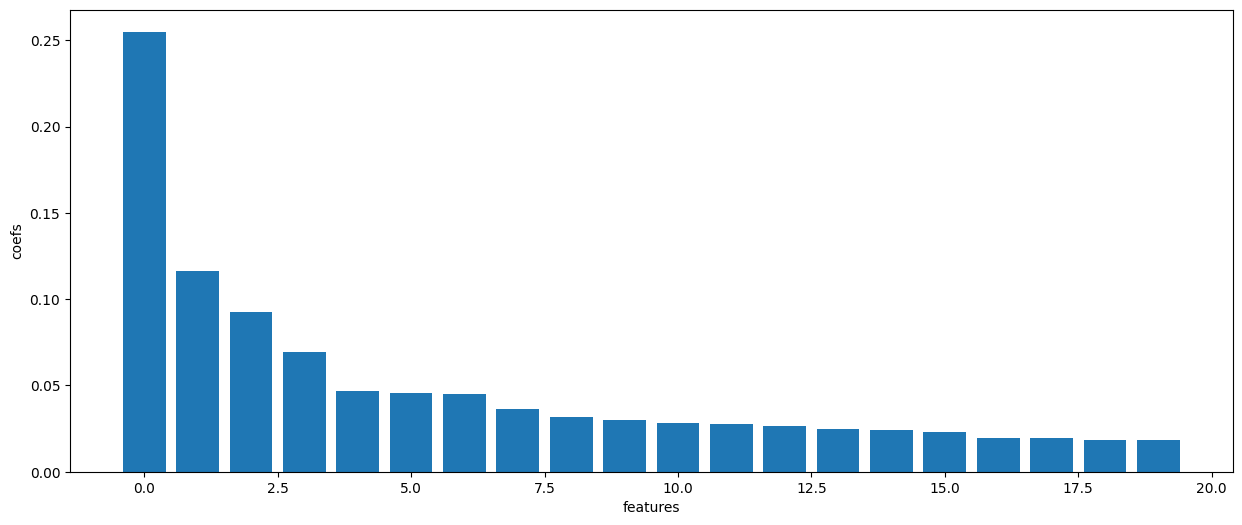

In [488]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.feature_importances_)), sorted(rf.feature_importances_, reverse=True))
plt.xlabel('features')
plt.ylabel('coefs');

In [489]:
rfc_df = df.copy()

In [490]:
rfc_df.drop([16,17,18,19], axis=1, inplace=True)  # Убрал наименее значимые признаки, без ущерба для точности модели

In [491]:
X_train, X_test, y_train, y_test = train_test_split(rfc_df, y_data_generated, test_size=.2, random_state=42)

In [492]:
rf = RandomForestClassifier(random_state=1).fit(X_train, y_train)
rf_score = rf.score(X_test, y_test)

Перебор признаков:

a) SequentialFeatureSelector.

b) Повторите п. 2 на отобранных признаках.

In [493]:
from sklearn.feature_selection import SequentialFeatureSelector

In [494]:
sfs_forward_df = df.copy()

In [495]:
X_train, X_test, y_train, y_test = train_test_split(sfs_forward_df, y_data_generated, test_size=.2, random_state=42)

In [496]:
sfs_forward = SequentialFeatureSelector(
    RandomForestClassifier(random_state=42), n_features_to_select=10, direction="forward"
)
sfs_forward.fit(X_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          n_features_to_select=10)

In [497]:
X_tr = sfs_forward.transform(X_train)
X_t = sfs_forward.transform(X_test)

X_tr.shape

(80, 10)

In [498]:
rf = RandomForestClassifier(random_state=42).fit(X_tr, y_train)
sfs_rf_score = rf.score(X_t, y_test)

In [499]:
columns_list = ['Точность на тестовых выборках']

index_list = ['Исходные данные', 'Кросс-валидация', 'Лог.Регр после коррел.очистки', 'KNN', 'Лог.регр.+SelectFromModel', 'RandomForestClassifier', 'RFC + SequentialFeatureSelector']

np_arr_results = np.array([logRegInitial_score, cvs_score, logreg_score, knn_score, sfm_lr_score, rf_score, sfs_rf_score]).T

In [500]:
scores_table = pd.DataFrame(np_arr_results, columns=columns_list, index=index_list).sort_values('Точность на тестовых выборках', ascending=False)

In [501]:
scores_table

,Точность на тестовых выборках
Исходные данные,0.925
Лог.регр.+SelectFromModel,0.900
RandomForestClassifier,0.900
RFC + SequentialFeatureSelector,0.900
Кросс-валидация,0.850
Лог.Регр после коррел.очистки,0.800
KNN,0.800
